# EE0005 Project Exploratory Analysis


## Initialization


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
jobData = pd.read_csv('fake_job_postings.csv')
jobData.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
jobData['fraudulent'] = jobData['fraudulent'].astype('bool')

In [4]:
jobData['fraudulent'].describe()

count     17880
unique        2
top       False
freq      17014
Name: fraudulent, dtype: object

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

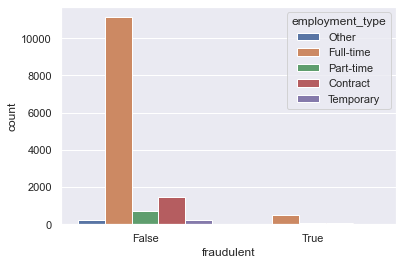

In [5]:
sb.countplot(x = 'fraudulent', hue = 'employment_type', data = jobData)

---

# Analysis of fake job postings

In the following sections, we will be looking into some of the characteristics that differentiate fake job postings from the legitimate ones.

## How many of the fake postings have a recruitment process?

When analysing the relationship between fraudulent postings and their recruitment process, we discovered that a large percentage of fake job postings hire without holding an interview. 

### 71% of fake postings hire without any recruitment process

The plot below shows that 71% of the fraudulent postings hire were being offered without an interview to screen the applicants. The purpose of such listings is usually to scam the applicants and to gather their personal and financial data. As such, it makes sense that the scammers would make the barrier of entry for applicants low to attract more people to apply.

In [7]:
fakepostings = jobData[jobData.fraudulent]
fakepostings.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,True
144,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,True
173,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,True
180,181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,True
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,True


No questions: 616
Has questions: 250


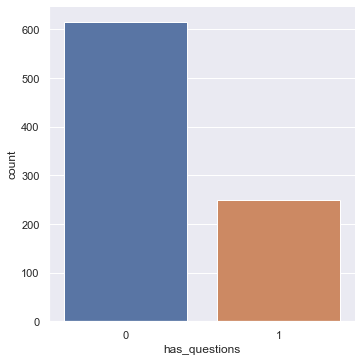

In [10]:
print(f"No questions: {fakepostings.has_questions[fakepostings.has_questions==False].count()}")
print(f"Has questions: {fakepostings.has_questions[fakepostings.has_questions==True].count()}")
sb.catplot( x = 'has_questions', data = fakepostings, kind="count")

### Similarly, a large percentage of the fake postings also do not have a logo attached to the companies. 
Only 32% of the companies listed in the fake job postings have a company logo.

No logo: 583
Has logo: 283


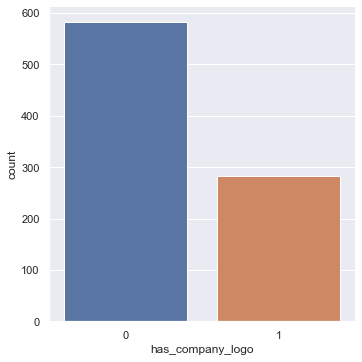

In [11]:
print(f"No logo: {fakepostings.has_company_logo[fakepostings.has_company_logo==False].count()}")
print(f"Has logo: {fakepostings.has_company_logo[fakepostings.has_company_logo==True].count()}")
sb.catplot( x = 'has_company_logo', data = fakepostings, kind="count")